In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'
import pandas as pd

Conds = ['D0','D4','D8']
reps = ['a','b','c']

slct_data = {}

In [2]:
# Processing count table
data = {}
for SP in [Cond+rep for Cond in Conds for rep in reps]:
    data[SP] = {}
    for LIB in ['RPF_']:
        for part in ['start','stop']:
            data[SP][LIB+part] = pd.read_excel(f'{Project}/Results/Tables/Metagene/Abundant/v20230529/adi_abundant_metagene2.xlsx', sheet_name=f'{LIB}{SP}_{part}')
            data[SP][LIB+part] = data[SP][LIB+part].set_index('transcript_id').T
            data[SP][LIB+part].index = data[SP][LIB+part].index.astype(int)

display(data['D0a']['RPF_start'])

transcript_id,ENSMUST00000029041.6,ENSMUST00000001547.8,ENSMUST00000087883.13,ENSMUST00000031668.10,ENSMUST00000055226.13,ENSMUST00000041331.4,ENSMUST00000039559.9,ENSMUST00000015712.15,ENSMUST00000201185.4,ENSMUST00000073012.13,...,ENSMUST00000167866.2,ENSMUST00000038027.6,ENSMUST00000039631.10,ENSMUST00000034276.13,ENSMUST00000019323.11,ENSMUST00000102923.10,ENSMUST00000022378.9,ENSMUST00000102917.11,ENSMUST00000042564.17,ENSMUST00000025649.10
-100,0,7,23,683,2,0,18,0,0,0,...,0,1,0,0,0,6,0,0,4,4
-99,0,6,0,29,5,0,37,0,0,0,...,0,1,0,2,0,1,0,0,0,1
-98,0,8,0,16,1,0,2433,0,0,0,...,0,0,0,0,0,1,0,1,0,0
-97,0,0,104,26,0,0,3617,1,0,0,...,0,0,0,0,0,2,0,0,0,0
-96,0,1,12,197,3,0,16,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1,26,26,5,175,5,24,0,0,10,...,2,0,5,0,0,0,2,0,0,0
197,9,163,157,51,554,18,2807,9,6,23,...,0,19,132,34,0,0,1,0,4,0
198,43,561,116,0,356,23,364,0,28,274,...,0,2,305,32,7,2,5,0,2,0
199,12,67,29,25,36,0,82,0,2,77,...,0,0,6,7,0,0,0,0,0,0


In [3]:
# Normalization
norm_type = 'total'

if norm_type == 'total':
    for SP in data:
        for LIB in ['RPF_']:
            for T_id in data[SP][LIB+'start']:
                total = sum(data[SP][LIB+'start'][T_id]) + sum(data[SP][LIB+'stop'][T_id])
                data[SP][LIB+'start'][T_id] = data[SP][LIB+'start'][T_id] / total
                data[SP][LIB+'stop'][T_id]  = data[SP][LIB+'stop'][T_id]  / total

# if norm_type == '5UTR':

In [4]:
# Selection of data range
shift = 0
range_shift = 0

for SP in data:
    for LIB in ['RPF_']:
        for part in ['start','stop']:
            data[SP][LIB+part]['adj_pos'] = data[SP][LIB+part].index + shift
            data[SP][LIB+part] = data[SP][LIB+part].set_index('adj_pos')
        
        data[SP][LIB+'start'] = data[SP][LIB+'start'].loc[ -40+range_shift : 60+range_shift, :].T
        data[SP][LIB+'stop']  = data[SP][LIB+'stop'].loc[ -80+range_shift : 20+range_shift, :].T

In [5]:
# Sorting table by start/stop peak
for SP in data:
    data[SP]['RPF_start']['crit'] = data[SP]['RPF_start'][-12]
    data[SP]['RPF_stop']['crit']  = data[SP]['RPF_start'][-12]
    
    data[SP]['RPF_start'] = data[SP]['RPF_start'].sort_values('crit', ascending=False).drop(columns='crit')
    data[SP]['RPF_stop'] = data[SP]['RPF_stop'].sort_values('crit', ascending=False).drop(columns='crit')
    
    data[SP]['RPF_start'] = data[SP]['RPF_start'].iloc[:90,:]
    data[SP]['RPF_stop'] = data[SP]['RPF_stop'].iloc[:90,:]

In [6]:
slct_data['Preadipocyte (0d)'] = data['D0a']
# slct_data['4d'] = data['D4a']
slct_data['Beige Adipocyte (8d)'] = data['D8a']

# Data of other paper (Martinez_etal.2023.Cell_Metabolism)

In [7]:
Conds = ['WH','BG']
reps = ['a']

# Processing count table
OP_data = {}
for SP in [Cond+rep for Cond in Conds for rep in reps]:
    OP_data[SP] = {}
    for LIB in ['RPF_']:
        for part in ['start','stop']:
            OP_data[SP][LIB+part] = pd.read_excel(f'{Project}/Results/Other_papers/Martinez_etal.2023.Cell_Metabolism/Tables/Metagene/Abundant/v20230706/Martinez_abundant_metagene.xlsx', sheet_name=f'{LIB}{SP}_{part}')
            OP_data[SP][LIB+part] = OP_data[SP][LIB+part].set_index('transcript_id').T
            OP_data[SP][LIB+part].index = OP_data[SP][LIB+part].index.astype(int)

# Normalization
norm_type = 'total'

if norm_type == 'total':
    for SP in OP_data:
        for LIB in ['RPF_']:
            for T_id in OP_data[SP][LIB+'start']:
                total = sum(OP_data[SP][LIB+'start'][T_id]) + sum(OP_data[SP][LIB+'stop'][T_id])
                OP_data[SP][LIB+'start'][T_id] = OP_data[SP][LIB+'start'][T_id] / total
                OP_data[SP][LIB+'stop'][T_id]  = OP_data[SP][LIB+'stop'][T_id]  / total

# Selection of data range
shift = 0
range_shift = 0
for SP in OP_data:
    for LIB in ['RPF_']:
        for part in ['start','stop']:
            OP_data[SP][LIB+part]['adj_pos'] = OP_data[SP][LIB+part].index + shift
            OP_data[SP][LIB+part] = OP_data[SP][LIB+part].set_index('adj_pos')
        
        OP_data[SP][LIB+'start'] = OP_data[SP][LIB+'start'].loc[ -40+range_shift : 60+range_shift, :].T
        OP_data[SP][LIB+'stop']  = OP_data[SP][LIB+'stop'].loc[ -80+range_shift : 20+range_shift, :].T

# Sorting table by start/stop peak
for SP in OP_data:
    for LIB in ['RPF_']:
        OP_data[SP][LIB+'start']['crit'] = OP_data[SP][LIB+'start'][-12] + OP_data[SP][LIB+'start'][-13]
        OP_data[SP][LIB+'stop']['crit']  = OP_data[SP][LIB+'start'][-12] + OP_data[SP][LIB+'start'][-13]
        
        OP_data[SP][LIB+'start'] = OP_data[SP][LIB+'start'].sort_values('crit', ascending=False).drop(columns='crit').dropna()
        OP_data[SP][LIB+'stop'] = OP_data[SP][LIB+'stop'].sort_values('crit', ascending=False).drop(columns='crit').dropna()


In [8]:
# slct_data['Martinez et al.\nWhite adipocyte'] = OP_data['WHa']
slct_data['Martinez et al. Beige Adipocyte'] = OP_data['BGa']

# Data of other paper (Reid_etal.2017.Scientific_Reports)

In [9]:
Conds = ['WD0']
reps = ['a']

# Processing count table
OP_data = {}
for SP in [Cond+rep for Cond in Conds for rep in reps]:
    OP_data[SP] = {}
    for LIB in ['RPF_']:
        for part in ['start','stop']:
            OP_data[SP][LIB+part] = pd.read_csv(f'{Project}/Results/Other_papers/Reid_etal.2017.Scientific_Reports/Tables/Metagene/Abundant/v20220703/Reid_{SP}_abndt_metagene-{part}.tsv', sep='\t')
            OP_data[SP][LIB+part] = OP_data[SP][LIB+part].set_index('transcript_id').T
            OP_data[SP][LIB+part].index = OP_data[SP][LIB+part].index.astype(int)

# Normalization
norm_type = 'total'

if norm_type == 'total':
    for SP in OP_data:
        for LIB in ['RPF_']:
            for T_id in OP_data[SP][LIB+'start']:
                total = sum(OP_data[SP][LIB+'start'][T_id]) + sum(OP_data[SP][LIB+'stop'][T_id])
                OP_data[SP][LIB+'start'][T_id] = OP_data[SP][LIB+'start'][T_id] / total
                OP_data[SP][LIB+'stop'][T_id]  = OP_data[SP][LIB+'stop'][T_id]  / total

# Selection of data range
shift = 0
range_shift = 0
for SP in OP_data:
    for LIB in ['RPF_']:
        for part in ['start','stop']:
            OP_data[SP][LIB+part]['adj_pos'] = OP_data[SP][LIB+part].index + shift
            OP_data[SP][LIB+part] = OP_data[SP][LIB+part].set_index('adj_pos')
        
        OP_data[SP][LIB+'start'] = OP_data[SP][LIB+'start'].loc[ -40+range_shift : 60+range_shift, :].T
        OP_data[SP][LIB+'stop']  = OP_data[SP][LIB+'stop'].loc[ -80+range_shift : 20+range_shift, :].T

# Sorting table by start/stop peak
for SP in OP_data:
    for LIB in ['RPF_']:
        OP_data[SP][LIB+'start']['crit'] = OP_data[SP][LIB+'start'][-12] + OP_data[SP][LIB+'start'][-13]
        OP_data[SP][LIB+'stop']['crit']  = OP_data[SP][LIB+'start'][-12] + OP_data[SP][LIB+'start'][-13]
        
        OP_data[SP][LIB+'start'] = OP_data[SP][LIB+'start'].sort_values('crit', ascending=False).drop(columns='crit').dropna()
        OP_data[SP][LIB+'stop'] = OP_data[SP][LIB+'stop'].sort_values('crit', ascending=False).drop(columns='crit').dropna()


/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_68405/1350972288.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  OP_data[SP][LIB+part]['adj_pos'] = OP_data[SP][LIB+part].index + shift
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_68405/1350972288.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  OP_data[SP][LIB+part]['adj_pos'] = OP_data[SP][LIB+part].index + shift


In [10]:
# slct_data['Reid et al. Brown adipose tissue'] = OP_data['BATa']
slct_data['Reid et al. Preadipocyte'] = OP_data['WD0a']

In [11]:
TOPnum = 50

for sample in slct_data:
    slct_data[sample]['RPF_start'] = slct_data[sample]['RPF_start'][:TOPnum]
    slct_data[sample]['RPF_stop'] = slct_data[sample]['RPF_stop'][:TOPnum]

# Plotting

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=6)     # fontsize of the axes title
plt.rc('axes', labelsize=6)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 8

plt.rc('axes', axisbelow=True) #push axes to back
plt.rcParams['axes.linewidth'] = 0.5

def plot_custom(ax):
    # ax.spines['left'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    # ax.spines['top'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(length=2, pad=2, width=0.5)


In [13]:
from matplotlib import cm
from matplotlib.colors import ListedColormap

frm = 0.5
to = 0.2

x = int((1-frm)*to*10000)
y = int(frm*(1-to)*10000)

jet1 = cm.get_cmap('jet', x)
jet2 = cm.get_cmap('jet', y)

jet1 = jet1(np.linspace(0, 1, x))
jet2 = jet2(np.linspace(0, 1, y))

n1 = int(x*frm)
n2 = int(y*(1-frm))
newcmp = ListedColormap(np.concatenate((jet1[:n1], jet2[-n2:]), axis=0))

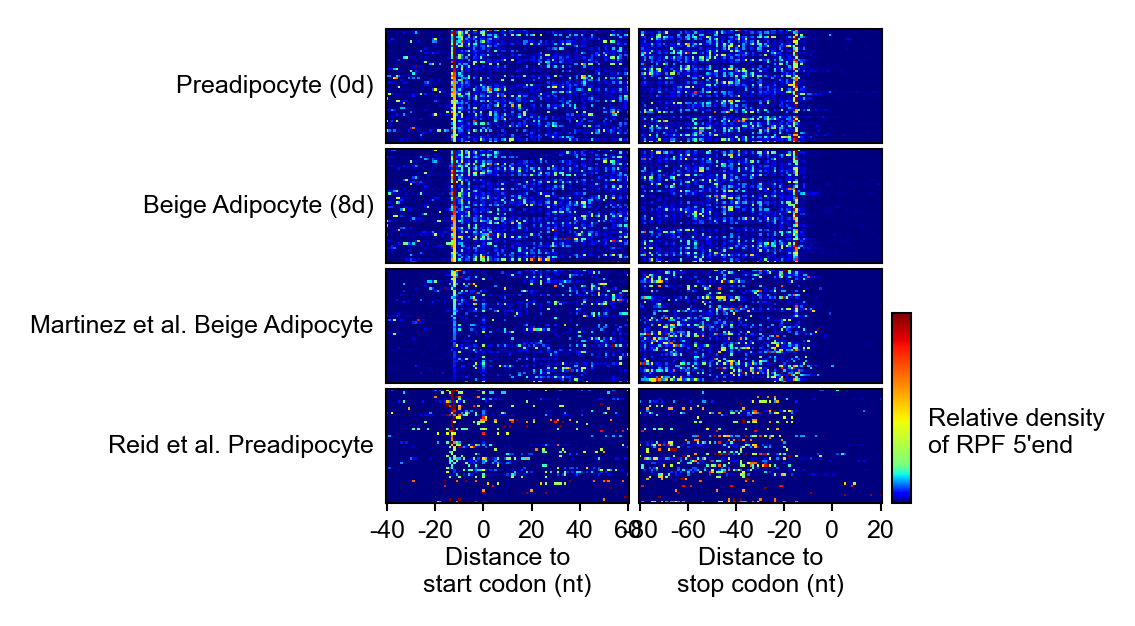

<Figure size 640x480 with 0 Axes>

In [14]:
sF = 1 # Size factor
wgap = 0.04
hgap = 0.05
nrow, ncol = 4, 2

fs_w = ncol*sF + (ncol-1)*wgap*sF
fs_h = nrow*sF + (nrow-1)*hgap*sF

fig = plt.figure(figsize=( fs_w*0.81, fs_h*0.38 ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    left=0, right=1, bottom=0, top=1,
                    wspace=wgap, hspace=hgap)

for SP, row in zip(slct_data, range(nrow)):
    ax1 = fig.add_subplot(grid[row,0])
    ax2 = fig.add_subplot(grid[row,1])
    
    cmap = newcmp # 'viridis' 'turbo'
    sct1 = ax1.imshow(slct_data[SP]['RPF_start'], cmap=cmap, aspect='auto', vmin=0, vmax=0.05, interpolation='none')
    sct2 = ax2.imshow(slct_data[SP]['RPF_stop'],  cmap=cmap, aspect='auto', vmin=0, vmax=0.05, interpolation='none')
    
    ax1.set_yticks([])
    ax2.set_yticks([])
    
    ax1.set_ylabel(SP, rotation=0, ha='right', va='center', labelpad=1)
    
    if row==(nrow-1):
        ax1.set_xticks([0,20,40,60,80,100])
        ax2.set_xticks([0,20,40,60,80,100])
        ax1.set_xticklabels(np.array([-40,-20,0,20,40,60])+range_shift)
        ax2.set_xticklabels(np.array([-80,-60,-40,-20,0,20])+range_shift)
        ax1.set_xlabel('Distance to\nstart codon (nt)', labelpad=1)
        ax2.set_xlabel('Distance to\nstop codon (nt)', labelpad=1)
    else:
        ax1.set_xticks([])
        ax2.set_xticks([])

    plot_custom(ax1)
    plot_custom(ax2)

# cbar_size = [0.1, -0.3, 0.4, 0.04]
# cbar = plt.colorbar(sct2, cax = fig.add_axes(cbar_size), orientation='horizontal')
# cbar.set_ticks([])
# cbar.ax.tick_params(length=0)
# cbar.ax.set_ylabel("Relative density\nof RPF 5'end", fontsize=6, ha='left', va='top', rotation=0)
# cbar.ax.yaxis.set_label_position("right")

cbar_size = [1.02, 0, 0.04, 0.4]
cbar = plt.colorbar(sct2, cax = fig.add_axes(cbar_size))
cbar.set_ticks([])
cbar.ax.tick_params(length=0)
cbar.ax.set_ylabel("Relative density\nof RPF 5'end", fontsize=6, ha='left', va='top', rotation=0)
    
plt.savefig('adi_otherP_comp_abndt-metagene_heatmap.pdf', bbox_inches='tight')
plt.show()
plt.clf()

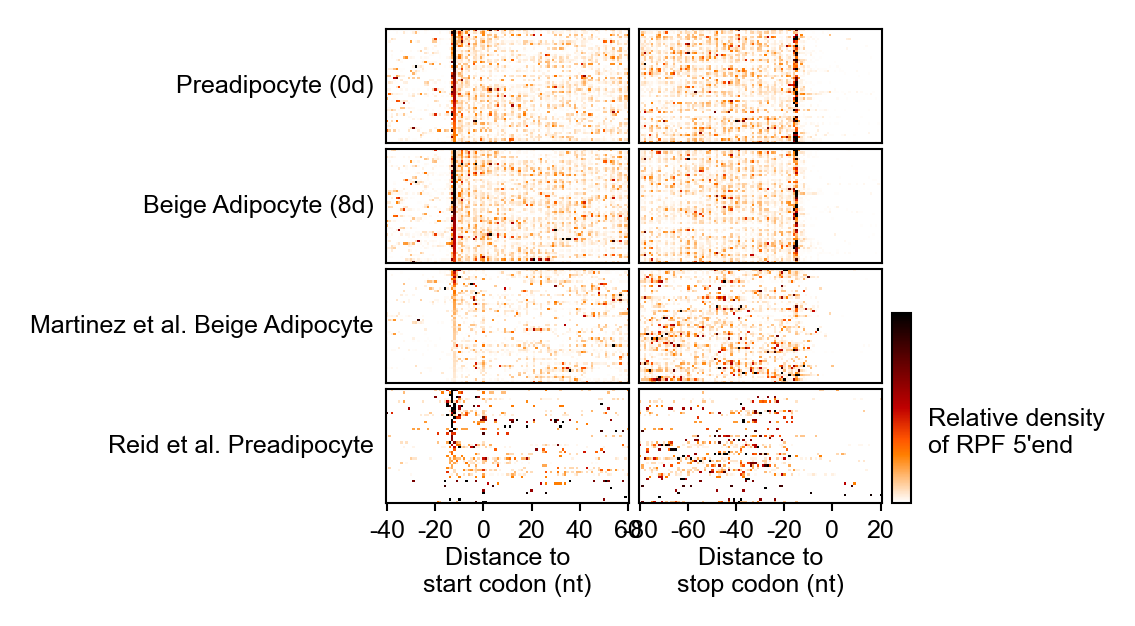

<Figure size 640x480 with 0 Axes>

In [15]:
sF = 1 # Size factor
wgap = 0.04
hgap = 0.05
nrow, ncol = 4, 2

fs_w = ncol*sF + (ncol-1)*wgap*sF
fs_h = nrow*sF + (nrow-1)*hgap*sF

fig = plt.figure(figsize=( fs_w*0.81, fs_h*0.38 ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    left=0, right=1, bottom=0, top=1,
                    wspace=wgap, hspace=hgap)

for SP, row in zip(slct_data, range(nrow)):
    ax1 = fig.add_subplot(grid[row,0])
    ax2 = fig.add_subplot(grid[row,1])
    
    cmap = 'gist_heat_r' # 'viridis' 'turbo' 'Purples'
    sct1 = ax1.imshow(slct_data[SP]['RPF_start'], cmap=cmap, aspect='auto', vmin=0, vmax=0.05, interpolation='none')
    sct2 = ax2.imshow(slct_data[SP]['RPF_stop'],  cmap=cmap, aspect='auto', vmin=0, vmax=0.05, interpolation='none')
    
    ax1.set_yticks([])
    ax2.set_yticks([])
    
    ax1.set_ylabel(SP, rotation=0, ha='right', va='center', labelpad=1)
    
    if row==(nrow-1):
        ax1.set_xticks([0,20,40,60,80,100])
        ax2.set_xticks([0,20,40,60,80,100])
        ax1.set_xticklabels(np.array([-40,-20,0,20,40,60])+range_shift)
        ax2.set_xticklabels(np.array([-80,-60,-40,-20,0,20])+range_shift)
        ax1.set_xlabel('Distance to\nstart codon (nt)', labelpad=1)
        ax2.set_xlabel('Distance to\nstop codon (nt)', labelpad=1)
    else:
        ax1.set_xticks([])
        ax2.set_xticks([])

    plot_custom(ax1)
    plot_custom(ax2)

# cbar_size = [0.1, -0.3, 0.4, 0.04]
# cbar = plt.colorbar(sct2, cax = fig.add_axes(cbar_size), orientation='horizontal')
# cbar.set_ticks([])
# cbar.ax.tick_params(length=0)
# cbar.ax.set_ylabel("Relative density\nof RPF 5'end", fontsize=6, ha='left', va='top', rotation=0)
# cbar.ax.yaxis.set_label_position("right")

cbar_size = [1.02, 0, 0.04, 0.4]
cbar = plt.colorbar(sct2, cax = fig.add_axes(cbar_size))
cbar.set_ticks([])
cbar.ax.tick_params(length=0)
cbar.ax.set_ylabel("Relative density\nof RPF 5'end", fontsize=6, ha='left', va='top', rotation=0)
    
plt.savefig('adi_otherP_comp_abndt-metagene_heatmap_Color2.pdf', bbox_inches='tight')
plt.show()
plt.clf()